In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import joblib

In [22]:
adni = pd.read_csv("data/ADNIMERGE_17Apr2025.csv")

columns = ['RID', 'VISCODE', 'DX_bl', 'DX', 'AGE', 'PTGENDER', 'PTEDUCAT', 'APOE4', 
           'MMSE', 'ADAS13', 'CDRSB', 'RAVLT_immediate', 'RAVLT_perc_forgetting']

df = adni[columns].copy()
df = df[df['VISCODE'] == 'bl']
df = df.dropna()

# class distribution
print("Class distribution (DX_bl):")
print(df['DX_bl'].value_counts())
print("\n")

Class distribution (DX_bl):
DX_bl
LMCI    634
CN      510
EMCI    379
AD      374
SMC     282
Name: count, dtype: int64




C:\Users\plech\AppData\Local\Temp\ipykernel_11980\2100268497.py:1: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adni = pd.read_csv("data/ADNIMERGE_17Apr2025.csv")


In [40]:
display(df[:50])

,RID,VISCODE,DX_bl,DX,AGE,PTGENDER,PTEDUCAT,APOE4,MMSE,ADAS13,CDRSB,RAVLT_immediate,RAVLT_perc_forgetting
0,2,bl,1,CN,74.3,1,16,0.0,28.0,18.67,0.0,44.0,54.54550
1,3,bl,0,Dementia,81.3,1,18,1.0,20.0,31.00,4.5,22.0,100.00000
5,4,bl,3,MCI,67.5,1,10,0.0,27.0,21.33,1.0,37.0,36.36360
10,5,bl,1,CN,73.7,1,16,0.0,29.0,14.67,0.0,37.0,44.44440
15,6,bl,3,MCI,80.4,0,13,0.0,25.0,25.67,0.5,30.0,83.33330
20,7,bl,0,Dementia,75.4,1,10,1.0,20.0,40.33,6.0,17.0,75.00000
22,10,bl,0,Dementia,73.9,0,12,1.0,24.0,24.33,5.0,20.0,100.00000
26,14,bl,1,CN,78.5,0,12,0.0,29.0,8.33,0.0,45.0,36.36360
31,15,bl,1,CN,80.8,1,18,1.0,29.0,9.00,0.0,50.0,25.00000
34,16,bl,1,CN,65.4,1,9,1.0,28.0,14.33,0.0,40.0,50.00000


In [24]:
le_gender = LabelEncoder()
df['PTGENDER'] = le_gender.fit_transform(df['PTGENDER'])

le_dx = LabelEncoder()
df['DX_bl'] = le_dx.fit_transform(df['DX_bl'])
print(f"Encoded classes: {le_dx.classes_}")

Encoded classes: ['AD' 'CN' 'EMCI' 'LMCI' 'SMC']


In [25]:
X = df[['AGE', 'PTGENDER', 'PTEDUCAT', 'APOE4', 'MMSE', 'ADAS13', 'CDRSB', 'RAVLT_immediate', 'RAVLT_perc_forgetting']]
y = df['DX_bl']

In [26]:
# Feature engineering
X['MMSE_ADAS_ratio'] = X['MMSE'] / (X['ADAS13'] + 1)
X['AGE_APOE_interaction'] = X['AGE'] * X['APOE4']
X['MMSE_squared'] = X['MMSE'] ** 2
X['AGE_squared'] = X['AGE'] ** 2

C:\Users\plech\AppData\Local\Temp\ipykernel_11980\978645094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MMSE_ADAS_ratio'] = X['MMSE'] / (X['ADAS13'] + 1)
C:\Users\plech\AppData\Local\Temp\ipykernel_11980\978645094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AGE_APOE_interaction'] = X['AGE'] * X['APOE4']
C:\Users\plech\AppData\Local\Temp\ipykernel_11980\978645094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [27]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42, test_size=0.2)

In [28]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original data shape: {X_train.shape}")
print(f"After SMOTE: {X_train_resampled.shape}\n")


Original data shape: (1743, 13)
After SMOTE: (2535, 13)



In [29]:
# Model evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    try:
        roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    except:
        roc = None
    
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    if roc:
        print(f"ROC AUC: {roc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    if hasattr(model, 'feature_importances_'):
        feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
        importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
        print("\nFeature Importance:")
        print(importances.head(10))
    
    return model, accuracy, roc


In [30]:
# MODEL 1: Random Forest
print("\n==== RANDOM FOREST ====")
rf_params = {
    'n_estimators': 300,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'bootstrap': True,
    'random_state': 42,
    'class_weight': 'balanced'
}

rf_model = RandomForestClassifier(**rf_params)
rf_model, rf_acc, rf_roc = evaluate_model(rf_model, X_train_resampled, y_train_resampled, X_test, y_test, "Random Forest")

# MODEL 2: XGBoost
print("\n==== XGBOOST ====")
xgb_params = {
    'n_estimators': 300,
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'random_state': 42,
    'use_label_encoder': False
}

xgb_model = XGBClassifier(**xgb_params)
xgb_model, xgb_acc, xgb_roc = evaluate_model(xgb_model, X_train_resampled, y_train_resampled, X_test, y_test, "XGBoost")

# MODEL 3: LightGBM
print("\n==== LIGHTGBM ====")
lgbm_params = {
    'n_estimators': 300,
    'learning_rate': 0.05,
    'max_depth': 7,
    'num_leaves': 31,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'multiclass',
    'random_state': 42
}

lgbm_model = LGBMClassifier(**lgbm_params)
lgbm_model, lgbm_acc, lgbm_roc = evaluate_model(lgbm_model, X_train_resampled, y_train_resampled, X_test, y_test, "LightGBM")

# MODEL 4: Gradient Boosting
print("\n==== GRADIENT BOOSTING ====")
gb_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'random_state': 42
}

gb_model = GradientBoostingClassifier(**gb_params)
gb_model, gb_acc, gb_roc = evaluate_model(gb_model, X_train_resampled, y_train_resampled, X_test, y_test, "Gradient Boosting")

# MODEL 5: SVM
print("\n==== SVM ====")
svm_model = SVC(C=10, gamma='scale', probability=True, random_state=42)
svm_model, svm_acc, svm_roc = evaluate_model(svm_model, X_train_resampled, y_train_resampled, X_test, y_test, "SVM")

# MODEL 6: MLP Neural Network
print("\n==== MLP NEURAL NETWORK ====")
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', 
                         solver='adam', alpha=0.0001, learning_rate='adaptive',
                         max_iter=1000, random_state=42)
mlp_model, mlp_acc, mlp_roc = evaluate_model(mlp_model, X_train_resampled, y_train_resampled, X_test, y_test, "MLP Neural Network")

# MODEL 7: Ensemble - Voting Classifier
print("\n==== ENSEMBLE - VOTING CLASSIFIER ====")

estimators = [
    ('rf', RandomForestClassifier(**rf_params)),
    ('xgb', XGBClassifier(**xgb_params)),
    ('lgbm', LGBMClassifier(**lgbm_params)),
    ('gb', GradientBoostingClassifier(**gb_params))
]

voting_model = VotingClassifier(estimators=estimators, voting='soft')
voting_model, voting_acc, voting_roc = evaluate_model(voting_model, X_train_resampled, y_train_resampled, X_test, y_test, "Ensemble - Voting Classifier")


==== RANDOM FOREST ====

--- Random Forest ---
Accuracy: 0.6514
ROC AUC: 0.9109

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        75
           1       0.71      0.74      0.72       102
           2       0.50      0.55      0.53        76
           3       0.63      0.68      0.65       127
           4       0.47      0.32      0.38        56

    accuracy                           0.65       436
   macro avg       0.64      0.63      0.63       436
weighted avg       0.65      0.65      0.65       436

Confusion Matrix:
[[63  0  1 11  0]
 [ 0 75  4  4 19]
 [ 0  0 42 34  0]
 [ 8  0 32 86  1]
 [ 0 31  5  2 18]]

Feature Importance:
CDRSB                    0.289003
MMSE_ADAS_ratio          0.122075
ADAS13                   0.098879
MMSE                     0.074252
MMSE_squared             0.072855
RAVLT_immediate          0.070455
AGE_squared              0.060138
RAVLT_perc_forgetting    0.059392
AGE 

c:\Users\plech\OneDrive\Documentos\Alzheimer-s-Disease-ML-Model\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:59:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost ---
Accuracy: 0.6537
ROC AUC: 0.9158

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        75
           1       0.71      0.71      0.71       102
           2       0.53      0.53      0.53        76
           3       0.63      0.71      0.67       127
           4       0.44      0.36      0.40        56

    accuracy                           0.65       436
   macro avg       0.64      0.63      0.63       436
weighted avg       0.65      0.65      0.65       436

Confusion Matrix:
[[63  0  0 12  0]
 [ 0 72  2  4 24]
 [ 0  0 40 36  0]
 [ 8  0 28 90  1]
 [ 0 30  5  1 20]]

Feature Importance:
CDRSB                    0.357263
MMSE_ADAS_ratio          0.119156
MMSE_squared             0.115724
MMSE                     0.087419
ADAS13                   0.046062
AGE_squared              0.038764
PTEDUCAT                 0.037941
AGE                      0.036091
RAVLT_perc_forgetting    0.033521
A

c:\Users\plech\OneDrive\Documentos\Alzheimer-s-Disease-ML-Model\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\plech\OneDrive\Documentos\Alzheimer-s-Disease-ML-Model\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- LightGBM ---
Accuracy: 0.6606
ROC AUC: 0.9119

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        75
           1       0.68      0.72      0.70       102
           2       0.55      0.58      0.56        76
           3       0.67      0.71      0.69       127
           4       0.40      0.29      0.33        56

    accuracy                           0.66       436
   macro avg       0.64      0.63      0.63       436
weighted avg       0.65      0.66      0.65       436

Confusion Matrix:
[[65  0  0 10  0]
 [ 0 73  3  3 23]
 [ 1  0 44 31  0]
 [ 8  0 28 90  1]
 [ 0 34  5  1 16]]

Feature Importance:
AGE                      6152
MMSE_ADAS_ratio          5542
RAVLT_immediate          5104
RAVLT_perc_forgetting    4356
ADAS13                   4319
CDRSB                    3343
PTEDUCAT                 3139
MMSE                     3067
AGE_APOE_interaction     2775
AGE_squared              2057
dtype:

c:\Users\plech\OneDrive\Documentos\Alzheimer-s-Disease-ML-Model\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:59:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2818
[LightGBM] [Info] Number of data points in the train set: 2535, number of used features: 13
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

c:\Users\plech\OneDrive\Documentos\Alzheimer-s-Disease-ML-Model\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\plech\OneDrive\Documentos\Alzheimer-s-Disease-ML-Model\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



==== MODEL COMPARISON ====
                Model  Accuracy   ROC AUC
6     Voting Ensemble  0.674312  0.915086
3   Gradient Boosting  0.669725  0.907112
2            LightGBM  0.660550  0.911869
1             XGBoost  0.653670  0.915811
0       Random Forest  0.651376  0.910926
4                 SVM  0.639908  0.905295
5  MLP Neural Network  0.591743  0.874366

Best performing model:  Voting Ensemble
Accuracy: 0.6743
ROC AUC: 0.9151


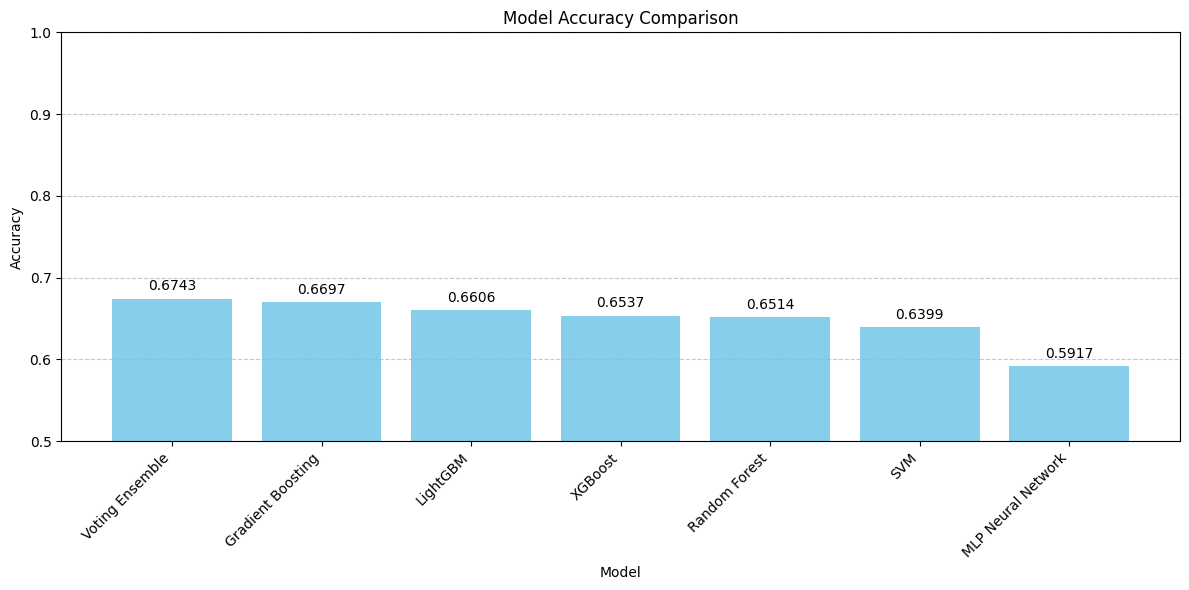

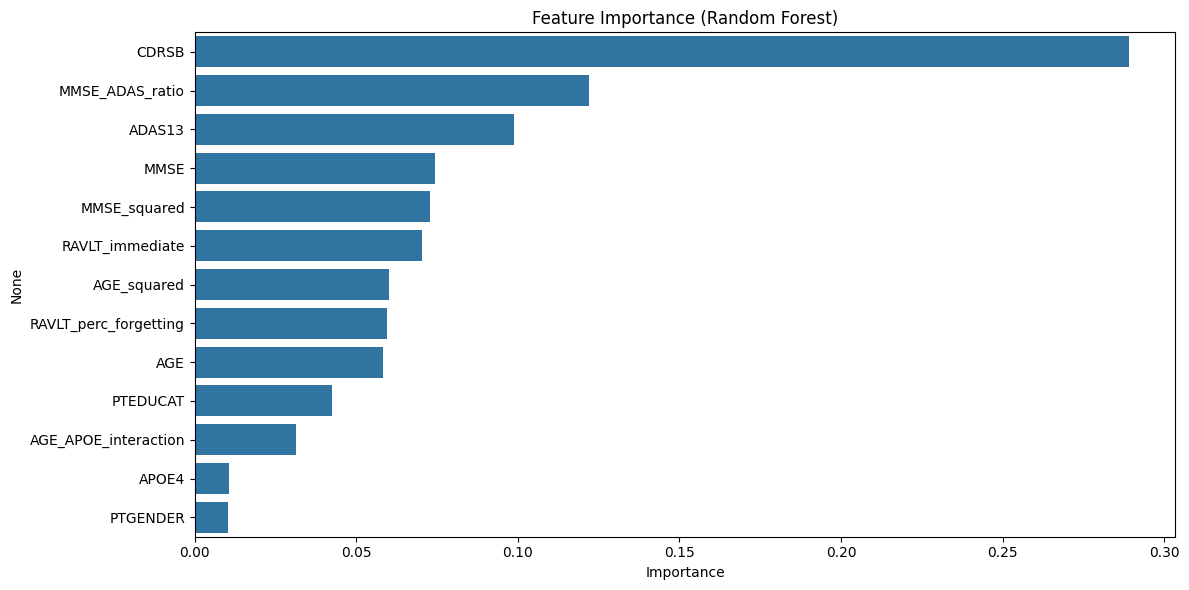

In [31]:
# Final model comparison
models = ["Random Forest", "XGBoost", "LightGBM", "Gradient Boosting", "SVM", "MLP Neural Network", "Voting Ensemble"]
accuracies = [rf_acc, xgb_acc, lgbm_acc, gb_acc, svm_acc, mlp_acc, voting_acc]
rocs = [rf_roc, xgb_roc, lgbm_roc, gb_roc, svm_roc, mlp_roc, voting_roc]

results_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'ROC AUC': rocs})
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("\n==== MODEL COMPARISON ====")
print(results_df)

# Visualize results
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.savefig('model_comparison.png')

# Feature importance plot
plt.figure(figsize=(12, 6))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')

print("\nBest performing model: ", results_df.iloc[0]['Model'])
print(f"Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")
print(f"ROC AUC: {results_df.iloc[0]['ROC AUC']:.4f}")

In [32]:
joblib.dump(voting_model, "modelo_alzheimer.pkl")
joblib.dump(scaler, "scaler_alzheimer.pkl")

['scaler_alzheimer.pkl']